<a href="https://colab.research.google.com/github/wnoyan/Cluster-Analysis/blob/master/Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing and Importing Required Modules**

In [ ]:
# importing the required modules

!pip install kneed
!pip install scikit-learn-extra

import random
import numpy as np
from kneed import KneeLocator
import matplotlib.pyplot as plt

from sklearn.cluster import Birch # birch
from sklearn.cluster import DBSCAN # dbscan
from sklearn.cluster import KMeans # kmeans
from sklearn_extra.cluster import KMedoids # k-medoids
from sklearn.cluster import AgglomerativeClustering # agnes

from sklearn.datasets import make_blobs # make_blobs
from sklearn.datasets import make_moons # make_moons
from sklearn.datasets import make_circles # make_circles

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

     |████████████████████████████████| 624kB 6.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=339581 sha256=66f7c9ffc9893bd464289d8b2f98b51f6bd79df8e725720e0896afa5dcafd421
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra


**Generating Synthetic Datasets and True Labels**

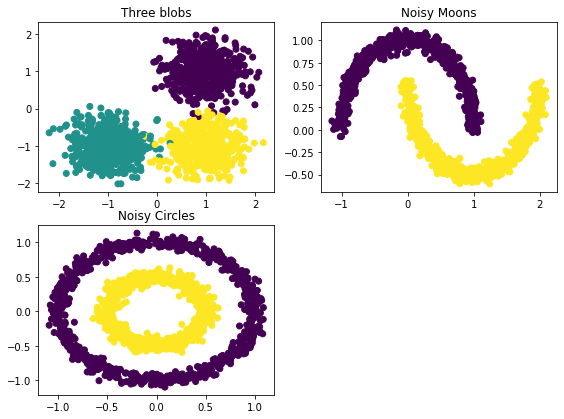

In [ ]:
# generating datasets and true labels

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.0005, top=1, left=.05, right=.95)

# make_bolbs
plt.subplot(321)
plt.title("Three blobs", fontsize='large')
centers = [[1, 1], [-1, -1], [1, -1]]
features, labels_true = make_blobs(n_samples=1500, centers=centers, cluster_std=0.4, random_state=0)
plt.scatter(features[:, 0], features[:, 1], marker='o', c=labels_true)

# make_moons with noise
plt.subplot(322)
plt.title("Noisy Moons", fontsize='large')
features_make_moons, labels_true_make_moons = make_moons(n_samples=1500, noise=.05)
plt.scatter(features_make_moons[:, 0], features_make_moons[:, 1], marker='o', c=labels_true_make_moons)

# make_circles with noise
plt.subplot(323)
plt.title("Noisy Circles", fontsize='large')
features_make_circles, labels_true_make_circles = make_circles(n_samples=1500, factor=.5, noise=.05)
plt.scatter(features_make_circles[:, 0], features_make_circles[:, 1], marker='o', c=labels_true_make_circles)

plt.show()

**Standardization Of The Datasets**

In [ ]:
# standardization of dataset

scaler = StandardScaler()

# make_bolbs
scaled_features = scaler.fit_transform(features)

# make_moons
scaled_features_make_moons = scaler.fit_transform(features_make_moons)

# make_circles
scaled_features_make_circles = scaler.fit_transform(features_make_circles)

**Instantiating Clustering Algorithms**

In [ ]:
# Instantiating clustering class

# kmeans
kmeans = KMeans(init="random", n_clusters=3, n_init=50, max_iter=1500, random_state=42)
kmeans_make_moons = KMeans(init="random", n_clusters=2, n_init=50, max_iter=1500, random_state=42)
kmeans_make_circles = KMeans(init="random", n_clusters=2, n_init=50, max_iter=1500, random_state=42)

# kmedoids
kmedoids = KMedoids(n_clusters=3, init='k-medoids++', max_iter=1500, random_state=0)
kmedoids_make_moons = KMedoids(n_clusters=2, init='k-medoids++', max_iter=1500, random_state=0)
kmedoids_make_circles = KMedoids(n_clusters=2, init='k-medoids++', max_iter=1500, random_state=0)

# agnes
agnes = AgglomerativeClustering(linkage='average', n_clusters=3)
agnes_make_moons = AgglomerativeClustering(linkage='average', n_clusters=2)
agnes_make_circles = AgglomerativeClustering(linkage='average', n_clusters=2)

# dbscan
dbscan =  DBSCAN(eps=0.3, min_samples=20)
dbscan_make_moons =  DBSCAN(eps=0.3, min_samples=10)
dbscan_make_circles =  DBSCAN(eps=0.3, min_samples=10)

# birch
birch =  Birch(n_clusters=3)
birch_make_moons =  Birch(n_clusters=2)
birch_make_circles =  Birch(n_clusters=2)

**Fitting The Datasets To Clustering Algorithms**

In [ ]:
# fitting the dataset to clustering class

# kmeans
kmeans.fit(scaled_features)
kmeans_make_moons.fit(scaled_features_make_moons)
kmeans_make_circles.fit(scaled_features_make_circles)

# kmedoids
kmedoids.fit(scaled_features)
kmedoids_make_moons.fit(scaled_features_make_moons)
kmedoids_make_circles.fit(scaled_features_make_circles)

# agnes
agnes.fit(scaled_features)
agnes_make_moons.fit(scaled_features_make_moons)
agnes_make_circles.fit(scaled_features_make_circles)

# dbscan
dbscan.fit(scaled_features)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

dbscan_make_moons.fit(scaled_features_make_moons)
core_samples_mask_make_moons = np.zeros_like(dbscan_make_moons.labels_, dtype=bool)
core_samples_mask_make_moons[dbscan_make_moons.core_sample_indices_] = True
labels_make_moons = dbscan_make_moons.labels_
make_moons_n_clusters_ = len(set(labels_make_moons)) - (1 if -1 in labels_make_moons else 0)
make_moons_n_noise_ = list(labels_make_moons).count(-1)

dbscan_make_circles.fit(scaled_features_make_circles)
core_samples_mask_make_circles = np.zeros_like(dbscan_make_circles.labels_, dtype=bool)
core_samples_mask_make_circles[dbscan_make_circles.core_sample_indices_] = True
labels_make_circles = dbscan_make_circles.labels_
make_circles_n_clusters_ = len(set(labels_make_circles)) - (1 if -1 in labels_make_circles else 0)
make_circles_n_noise_ = list(labels_make_circles).count(-1)

# birch
birch = birch.fit(scaled_features)
birch_labels = birch.predict(scaled_features)
birch_make_moons = birch_make_moons.fit(scaled_features_make_moons)
birch_make_moons_labels = birch_make_moons.predict(scaled_features_make_moons)
birch_make_circles = birch_make_circles.fit(scaled_features_make_circles)
birch_make_circles_labels = birch_make_circles.predict(scaled_features_make_circles)

**The Data and Clusters Plotting - Blobs Dataset**

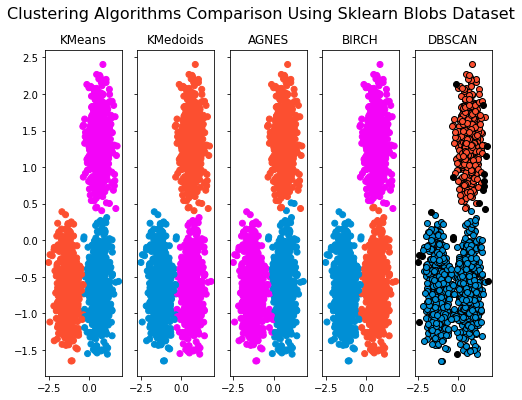

In [ ]:
# Plot the data and cluster

fig, (kmeans_ax, kmedoids_ax, agnes_ax, birch_ax, dbscan_ax) = plt.subplots(1, 5, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithms Comparison Using Sklearn Blobs Dataset", fontsize=16)
fte_colors = {0: "#008fd5", 1: "#fc4f30", 2: "#f304f8"}

# kmeans
kmeans_colors = [fte_colors[label] for label in kmeans.labels_]
kmeans_ax.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_colors)
kmeans_ax.set_title('KMeans')

# kmedoids
kmedoids_colors = [fte_colors[label] for label in kmedoids.labels_]
kmedoids_ax.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmedoids_colors)
kmedoids_ax.set_title('KMedoids')

# agnes
agnes_colors = [fte_colors[label] for label in agnes.labels_]
agnes_ax.scatter(scaled_features[:, 0], scaled_features[:, 1], c=agnes_colors)
agnes_ax.set_title('AGNES')

# birch
birch_colors = [fte_colors[label] for label in birch_labels]
birch_ax.scatter(scaled_features[:, 0], scaled_features[:, 1], c=birch_colors)
birch_ax.set_title('BIRCH')

# dbscan
# Black removed and is used for noise instead. 
unique_labels = set(labels)
colors = ["#008fd5", "#fc4f30", "#f304f8", "#000000"]
#colors = ['r', 'g', 'y', 'b']
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
    class_member_mask = (labels == k) 
    xy = scaled_features[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
    xy = scaled_features[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
dbscan_ax.set_title('DBSCAN') 
plt.show()

**The Evaluating Metrics - Blobs Dataset**

In [ ]:
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
print('KMeans Blobs Dataset Silhouette Score: ', kmeans_silhouette)
ari_kmeans = adjusted_rand_score(labels_true, kmeans.labels_)
ari_kmeans = round(ari_kmeans, 2)
print('KMeans Blobs Dataset Adjusted Rand Index (ARI) Score: ', ari_kmeans)
nmi_kmeans = normalized_mutual_info_score(labels_true, kmeans.labels_)
nmi_kmeans = round(nmi_kmeans, 2)
print('KMeans Bolbs Dataset Normalized Mutual Information (NMI) Score: ', nmi_kmeans)

kmedoids_silhouette = silhouette_score(scaled_features, kmedoids.labels_).round(2)
print('\nKMedoids Blobs Dataset Silhouette Score: ', kmedoids_silhouette)
ari_kmedoids = adjusted_rand_score(labels_true, kmedoids.labels_)
ari_kmedoids = round(ari_kmedoids, 2)
print('KMedoids Blobs Dataset Adjusted Rand Index (ARI) Score: ', ari_kmedoids)
nmi_kmedoids = normalized_mutual_info_score(labels_true, kmedoids.labels_)
nmi_kmedoids = round(nmi_kmedoids, 2)
print('KMedoids Bolbs Dataset Normalized Mutual Information (NMI) Score: ', nmi_kmedoids)

agnes_silhouette = silhouette_score(scaled_features, agnes.labels_).round(2)
print('\nAGNES Blobs Dataset Silhouette Score: ', agnes_silhouette)
ari_agnes = adjusted_rand_score(labels_true, agnes.labels_)
ari_agnes = round(ari_agnes, 2)
print('AGNES Blobs Dataset Adjusted Rand Index (ARI) Score: ', ari_agnes)
nmi_agnes = normalized_mutual_info_score(labels_true, agnes.labels_)
nmi_agnes = round(nmi_agnes, 2)
print('AGNES Bolbs Dataset Normalized Mutual Information (NMI) Score: ', nmi_agnes)

birch_silhouette = silhouette_score(scaled_features, birch_labels).round(2)
print('\nBIRCH Blobs Dataset Silhouette Score: ', birch_silhouette)
ari_birch = adjusted_rand_score(labels_true, birch_labels)
ari_birch = round(ari_birch, 2)
print('BIRCH Blobs Dataset Adjusted Rand Index (ARI) Score: ', ari_birch)
nmi_birch = normalized_mutual_info_score(labels_true, birch_labels)
nmi_birch = round(nmi_birch, 2)
print('BIRCH Bolbs Dataset Normalized Mutual Information (NMI) Score: ', nmi_birch)

dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)
print('\nDBSCAN Blobs Dataset Silhouette Score: ', dbscan_silhouette)
ari_dbscan = adjusted_rand_score(labels_true, dbscan.labels_)
ari_dbscan = round(ari_dbscan, 2)
print('DBSCAN Blobs Dataset Adjusted Rand Index (ARI) Score: ', ari_dbscan)
nmi_dbscan = normalized_mutual_info_score(labels_true, dbscan.labels_)
nmi_dbscan = round(nmi_dbscan, 2)
print('DBSCAN Bolbs Dataset Normalized Mutual Information (NMI) Score: ', nmi_dbscan)

KMeans Blobs Dataset Silhouette Score:  0.64
KMeans Blobs Dataset Adjusted Rand Index (ARI) Score:  0.97
KMeans Bolbs Dataset Normalized Mutual Information (NMI) Score:  0.95

KMedoids Blobs Dataset Silhouette Score:  0.64
KMedoids Blobs Dataset Adjusted Rand Index (ARI) Score:  0.97
KMedoids Bolbs Dataset Normalized Mutual Information (NMI) Score:  0.95

AGNES Blobs Dataset Silhouette Score:  0.64
AGNES Blobs Dataset Adjusted Rand Index (ARI) Score:  0.95
AGNES Bolbs Dataset Normalized Mutual Information (NMI) Score:  0.92

BIRCH Blobs Dataset Silhouette Score:  0.64
BIRCH Blobs Dataset Adjusted Rand Index (ARI) Score:  0.97
BIRCH Bolbs Dataset Normalized Mutual Information (NMI) Score:  0.95

DBSCAN Blobs Dataset Silhouette Score:  0.45
DBSCAN Blobs Dataset Adjusted Rand Index (ARI) Score:  0.54
DBSCAN Bolbs Dataset Normalized Mutual Information (NMI) Score:  0.67


**The Data and Clusters Plotting - Moons Dataset**

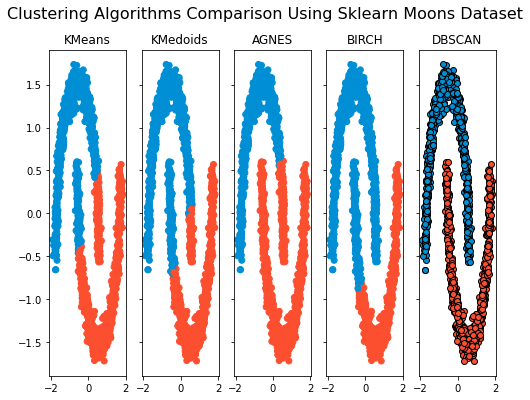

In [ ]:
# Plot the data and cluster

fig, (kmeans_ax, kmedoids_ax, agnes_ax, birch_ax, dbscan_ax) = plt.subplots(1, 5, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithms Comparison Using Sklearn Moons Dataset", fontsize=16)
fte_colors = {0: "#008fd5", 1: "#fc4f30", 2: "#f304f8"}

# kmeans
kmeans_colors = [fte_colors[label] for label in kmeans_make_moons.labels_]
kmeans_ax.scatter(scaled_features_make_moons[:, 0], scaled_features_make_moons[:, 1], c=kmeans_colors)
kmeans_ax.set_title('KMeans')

# kmedoids
kmedoids_colors = [fte_colors[label] for label in kmedoids_make_moons.labels_]
kmedoids_ax.scatter(scaled_features_make_moons[:, 0], scaled_features_make_moons[:, 1], c=kmedoids_colors)
kmedoids_ax.set_title('KMedoids')

# agnes
agnes_colors = [fte_colors[label] for label in agnes_make_moons.labels_]
agnes_ax.scatter(scaled_features_make_moons[:, 0], scaled_features_make_moons[:, 1], c=agnes_colors)
agnes_ax.set_title('AGNES')

# birch
birch_colors = [fte_colors[label] for label in birch_make_moons_labels]
birch_ax.scatter(scaled_features_make_moons[:, 0], scaled_features_make_moons[:, 1], c=birch_colors)
birch_ax.set_title('BIRCH')

# dbscan
# Black removed and is used for noise instead. 
unique_labels = set(labels_make_moons)
colors = ["#008fd5", "#fc4f30", "#f304f8", "#000000"]
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
    class_member_mask = (labels_make_moons == k) 
    xy = scaled_features_make_moons[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
    xy = scaled_features_make_moons[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
dbscan_ax.set_title('DBSCAN') 
plt.show()

#plt.show()

**The Evaluating Metrics - Moons Dataset**

In [ ]:
kmeans_silhouette_make_moons = silhouette_score(scaled_features_make_moons, kmeans_make_moons.labels_).round(2)
print('KMeans Moons Dataset Silhouette Score: ', kmeans_silhouette_make_moons)
ari_kmeans_make_moons = adjusted_rand_score(labels_true_make_moons, kmeans_make_moons.labels_)
ari_kmeans_make_moons = round(ari_kmeans_make_moons, 2)
print('KMeans Moons Dataset Adjusted Rand Index (ARI) Score: ', ari_kmeans_make_moons)
nmi_kmeans_make_moons = normalized_mutual_info_score(labels_true_make_moons, kmeans_make_moons.labels_)
nmi_kmeans_make_moons = round(nmi_kmeans_make_moons, 2)
print('KMeans Moons Dataset Normalized Mutual Information (NMI) Score: ', nmi_kmeans_make_moons)

kmedoids_silhouette_make_moons = silhouette_score(scaled_features_make_moons, kmedoids_make_moons.labels_).round(2)
print('\nKMedoids Moons Dataset Silhouette Score: ', kmedoids_silhouette_make_moons)
ari_kmedoids_make_moons = adjusted_rand_score(labels_true_make_moons, kmedoids_make_moons.labels_)
ari_kmedoids_make_moons = round(ari_kmedoids_make_moons, 2)
print('KMedoids Moons Dataset Adjusted Rand Index (ARI) Score: ', ari_kmedoids_make_moons)
nmi_kmedoids_make_moons = normalized_mutual_info_score(labels_true_make_moons, kmedoids_make_moons.labels_)
nmi_kmedoids_make_moons = round(nmi_kmedoids_make_moons, 2)
print('KMedoids Moons Dataset Normalized Mutual Information (NMI) Score: ', nmi_kmedoids_make_moons)


agnes_silhouette_make_moons = silhouette_score(scaled_features_make_moons, agnes_make_moons.labels_).round(2)
print('\nAGNES Moons Dataset Silhouette Score: ', agnes_silhouette_make_moons)
ari_agnes_make_moons = adjusted_rand_score(labels_true_make_moons, agnes_make_moons.labels_)
ari_agnes_make_moons = round(ari_agnes_make_moons, 2)
print('AGNES Moons Dataset Adjusted Rand Index (ARI) Score: ', ari_agnes_make_moons)
nmi_agnes_make_moons = normalized_mutual_info_score(labels_true_make_moons, agnes_make_moons.labels_)
nmi_agnes_make_moons = round(nmi_agnes_make_moons, 2)
print('AGNES Moons Dataset Normalized Mutual Information (NMI) Score: ', nmi_agnes_make_moons)

birch_silhouette_make_moons = silhouette_score(scaled_features_make_moons, birch_make_moons_labels).round(2)
print('\nBIRCH Moons Dataset Silhouette Score: ', birch_silhouette_make_moons)
ari_birch_make_moons = adjusted_rand_score(labels_true_make_moons, birch_make_moons_labels)
ari_birch_make_moons = round(ari_birch_make_moons, 2)
print('BIRCH Moons Dataset Adjusted Rand Index (ARI) Score: ', ari_birch_make_moons)
nmi_birch_make_moons = normalized_mutual_info_score(labels_true_make_moons, birch_make_moons_labels)
nmi_birch_make_moons = round(nmi_birch_make_moons, 2)
print('BIRCH Moons Dataset Normalized Mutual Information (NMI) Score: ', nmi_birch_make_moons)

dbscan_silhouette_make_moons = silhouette_score(scaled_features_make_moons, dbscan_make_moons.labels_).round(2)
print('\nDBSCAN Moons Dataset Silhouette Score: ', dbscan_silhouette_make_moons)
ari_dbscan_make_moons = adjusted_rand_score(labels_true_make_moons, dbscan_make_moons.labels_)
ari_dbscan_make_moons = round(ari_dbscan_make_moons, 2)
print('DBSCAN Moons Dataset Adjusted Rand Index (ARI) Score: ', ari_dbscan_make_moons)
nmi_dbscan_make_moons = normalized_mutual_info_score(labels_true_make_moons, dbscan_make_moons.labels_)
nmi_dbscan_make_moons = round(nmi_dbscan_make_moons, 2)
print('DBSCAN Moons Dataset Normalized Mutual Information (NMI) Score: ', nmi_dbscan_make_moons)

KMeans Moons Dataset Silhouette Score:  0.5
KMeans Moons Dataset Adjusted Rand Index (ARI) Score:  0.49
KMeans Moons Dataset Normalized Mutual Information (NMI) Score:  0.39

KMedoids Moons Dataset Silhouette Score:  0.49
KMedoids Moons Dataset Adjusted Rand Index (ARI) Score:  0.51
KMedoids Moons Dataset Normalized Mutual Information (NMI) Score:  0.42

AGNES Moons Dataset Silhouette Score:  0.46
AGNES Moons Dataset Adjusted Rand Index (ARI) Score:  0.66
AGNES Moons Dataset Normalized Mutual Information (NMI) Score:  0.64

BIRCH Moons Dataset Silhouette Score:  0.46
BIRCH Moons Dataset Adjusted Rand Index (ARI) Score:  0.59
BIRCH Moons Dataset Normalized Mutual Information (NMI) Score:  0.58

DBSCAN Moons Dataset Silhouette Score:  0.39
DBSCAN Moons Dataset Adjusted Rand Index (ARI) Score:  1.0
DBSCAN Moons Dataset Normalized Mutual Information (NMI) Score:  1.0


**The Data and Clusters Plotting - Circles Dataset**

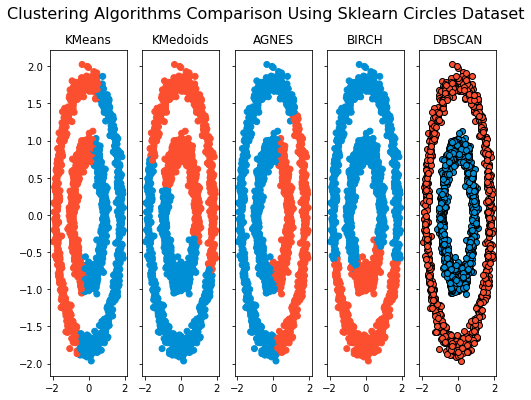

In [ ]:
# Plot the data and cluster

fig, (kmeans_ax, kmedoids_ax, agnes_ax, birch_ax, dbscan_ax) = plt.subplots(1, 5, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithms Comparison Using Sklearn Circles Dataset", fontsize=16)
fte_colors = {0: "#008fd5", 1: "#fc4f30", 2: "#f304f8"}

# kmeans
kmeans_colors = [fte_colors[label] for label in kmeans_make_circles.labels_]
kmeans_ax.scatter(scaled_features_make_circles[:, 0], scaled_features_make_circles[:, 1], c=kmeans_colors)
kmeans_ax.set_title('KMeans')

# kmedoids
kmedoids_colors = [fte_colors[label] for label in kmedoids_make_circles.labels_]
kmedoids_ax.scatter(scaled_features_make_circles[:, 0], scaled_features_make_circles[:, 1], c=kmedoids_colors)
kmedoids_ax.set_title('KMedoids')

# agnes
agnes_colors = [fte_colors[label] for label in agnes_make_circles.labels_]
agnes_ax.scatter(scaled_features_make_circles[:, 0], scaled_features_make_circles[:, 1], c=agnes_colors)
agnes_ax.set_title('AGNES')

# birch
birch_colors = [fte_colors[label] for label in birch_make_circles_labels]
birch_ax.scatter(scaled_features_make_circles[:, 0], scaled_features_make_circles[:, 1], c=birch_colors)
birch_ax.set_title('BIRCH')

# dbscan
# Black removed and is used for noise instead. 
unique_labels = set(labels_make_circles)
colors = ["#008fd5", "#fc4f30", "#f304f8", "#000000"]
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
    class_member_mask = (labels_make_circles == k) 
    xy = scaled_features_make_circles[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
    xy = scaled_features_make_circles[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
dbscan_ax.set_title('DBSCAN') 
plt.show()

**The Evaluating Metrics - Circles Dataset**

In [ ]:
kmeans_silhouette_make_circles = silhouette_score(scaled_features_make_circles, kmeans_make_circles.labels_).round(2)
print('KMeans Circles Dataset Silhouette Score: ', kmeans_silhouette_make_circles)
ari_kmeans_make_circles = adjusted_rand_score(labels_true_make_circles, kmeans_make_circles.labels_)
ari_kmeans_make_circles = round(ari_kmeans_make_circles, 2)
print('KMeans Circles Dataset Adjusted Rand Index (ARI) Score: ', ari_kmeans_make_circles)
nmi_kmeans_make_circles = normalized_mutual_info_score(labels_true_make_circles, kmeans_make_circles.labels_)
nmi_kmeans_make_circles = round(nmi_kmeans_make_circles, 2)
print('KMeans Circles Dataset Normalized Mutual Information (NMI) Score: ', nmi_kmeans_make_circles)

kmedoids_silhouette_make_circles = silhouette_score(scaled_features_make_circles, kmedoids_make_circles.labels_).round(2)
print('\nKMedoids Circles Dataset Silhouette Score: ', kmedoids_silhouette_make_circles)
ari_kmedoids_make_circles = adjusted_rand_score(labels_true_make_circles, kmedoids_make_circles.labels_)
ari_kmedoids_make_circles = round(ari_kmedoids_make_circles, 2)
print('KMedoids Circles Dataset Adjusted Rand Index (ARI) Score: ', ari_kmedoids_make_circles)
nmi_kmedoids_make_circles = normalized_mutual_info_score(labels_true_make_circles, kmedoids_make_circles.labels_)
nmi_kmedoids_make_circles = round(nmi_kmedoids_make_circles, 2)
print('KMedoids Circles Dataset Normalized Mutual Information (NMI) Score: ', nmi_kmedoids_make_circles)

agnes_silhouette_make_circles = silhouette_score(scaled_features_make_circles, agnes_make_circles.labels_).round(2)
print('\nAGNES Circles Dataset Silhouette Score: ', agnes_silhouette_make_circles)
ari_agnes_make_circles = adjusted_rand_score(labels_true_make_circles, agnes_make_circles.labels_)
ari_agnes_make_circles = round(ari_agnes_make_circles, 2)
print('AGNES Circles Dataset Adjusted Rand Index (ARI) Score: ', ari_agnes_make_circles)
nmi_agnes_make_circles = normalized_mutual_info_score(labels_true_make_circles, agnes_make_circles.labels_)
nmi_agnes_make_circles = round(nmi_agnes_make_circles, 2)
print('AGNES Circles Dataset Normalized Mutual Information (NMI) Score: ', nmi_agnes_make_circles)

birch_silhouette_make_circles = silhouette_score(scaled_features_make_circles, birch_make_circles_labels).round(2)
print('\nBIRCH Circles Dataset Silhouette Score: ', birch_silhouette_make_circles)
ari_birch_make_circles = adjusted_rand_score(labels_true_make_circles, birch_make_circles_labels)
ari_birch_make_circles = round(ari_birch_make_circles, 2)
print('BIRCH Circles Dataset Adjusted Rand Index (ARI) Score: ', ari_birch_make_circles)
nmi_birch_make_circles = normalized_mutual_info_score(labels_true_make_circles, birch_make_circles_labels)
nmi_birch_make_circles = round(nmi_birch_make_circles, 2)
print('BIRCH Circles Dataset Normalized Mutual Information (NMI) Score: ', nmi_birch_make_circles)

dbscan_silhouette_make_circles = silhouette_score(scaled_features_make_circles, dbscan_make_circles.labels_).round(2)
print('\nDBSCAN Circles Dataset Silhouette Score: ', dbscan_silhouette_make_circles)
ari_dbscan_make_circles = adjusted_rand_score(labels_true_make_circles, dbscan_make_circles.labels_)
ari_dbscan_make_circles = round(ari_dbscan_make_circles, 2)
print('DBSCAN Circles Dataset Adjusted Rand Index (ARI) Score: ', ari_dbscan_make_circles)
nmi_dbscan_make_circles = normalized_mutual_info_score(labels_true_make_circles, dbscan_make_circles.labels_)
nmi_dbscan_make_circles = round(nmi_dbscan_make_circles, 2)
print('DBSCAN Circles Dataset Normalized Mutual Information (NMI) Score: ', nmi_dbscan_make_circles)

KMeans Circles Dataset Silhouette Score:  0.35
KMeans Circles Dataset Adjusted Rand Index (ARI) Score:  -0.0
KMeans Circles Dataset Normalized Mutual Information (NMI) Score:  0.0

KMedoids Circles Dataset Silhouette Score:  0.35
KMedoids Circles Dataset Adjusted Rand Index (ARI) Score:  -0.0
KMedoids Circles Dataset Normalized Mutual Information (NMI) Score:  0.0

AGNES Circles Dataset Silhouette Score:  0.33
AGNES Circles Dataset Adjusted Rand Index (ARI) Score:  0.01
AGNES Circles Dataset Normalized Mutual Information (NMI) Score:  0.0

BIRCH Circles Dataset Silhouette Score:  0.31
BIRCH Circles Dataset Adjusted Rand Index (ARI) Score:  0.01
BIRCH Circles Dataset Normalized Mutual Information (NMI) Score:  0.01

DBSCAN Circles Dataset Silhouette Score:  0.11
DBSCAN Circles Dataset Adjusted Rand Index (ARI) Score:  1.0
DBSCAN Circles Dataset Normalized Mutual Information (NMI) Score:  1.0
